In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("D:/modelling/supermarket_sales - Sheet1.csv")

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
missing_values = df.isnull().sum()
missing_values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [11]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64


<Axes: title={'center': 'Average Total Amount Spent By Customer type '}, xlabel='Customer type'>

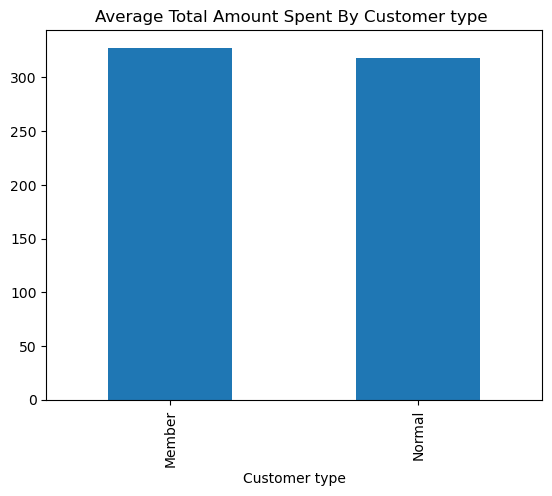

In [12]:
df_customer_type = df.groupby('Customer type')['Total'].mean()
print(df_customer_type)

# visualize the df_customer_type
df_customer_type.plot(kind='bar', title = 'Average Total Amount Spent By Customer type ')

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64


<Axes: title={'center': 'Average Total amount spent by gender'}, xlabel='Gender'>

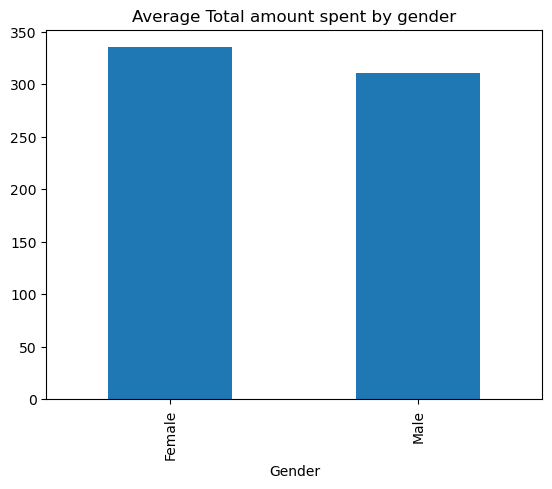

In [13]:
df_gender = df.groupby('Gender')['Total'].mean()
print(df_gender)
df_gender.plot(kind='bar',title='Average Total amount spent by gender')

<Axes: xlabel='Product line', ylabel='Total'>

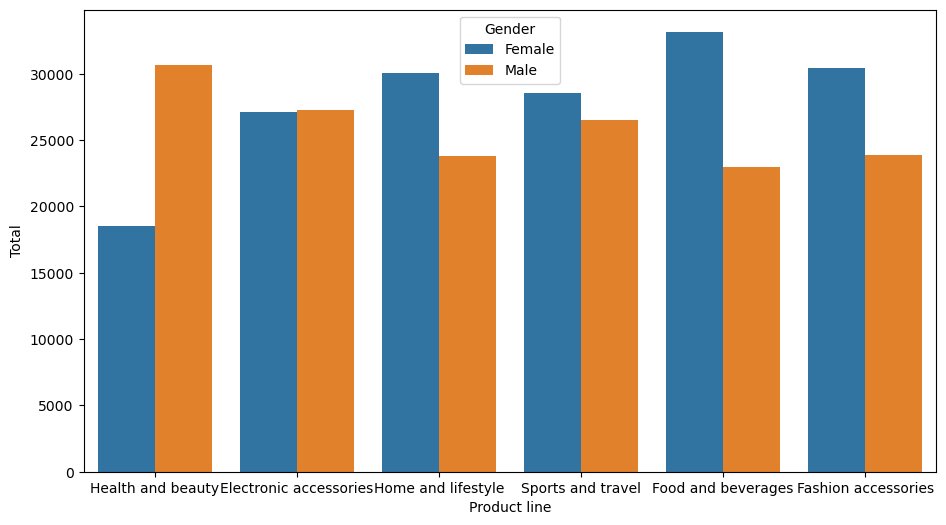

In [17]:
plt.figure(figsize=(11,6))
sns.barplot(x='Product line', y='Total',hue='Gender',data=df, estimator = sum, errorbar=None)

Gender  Product line          
Female  Electronic accessories    27102.0225
        Fashion accessories       30437.4000
        Food and beverages        33170.9175
        Health and beauty         18560.9865
        Home and lifestyle        30036.8775
        Sports and travel         28574.7210
Male    Electronic accessories    27235.5090
        Fashion accessories       23868.4950
        Food and beverages        22973.9265
        Health and beauty         30632.7525
        Home and lifestyle        23825.0355
        Sports and travel         26548.1055
Name: Total, dtype: float64


<Axes: title={'center': 'Total Sales for each Group of Gender and Product Line'}, xlabel='Gender,Product line'>

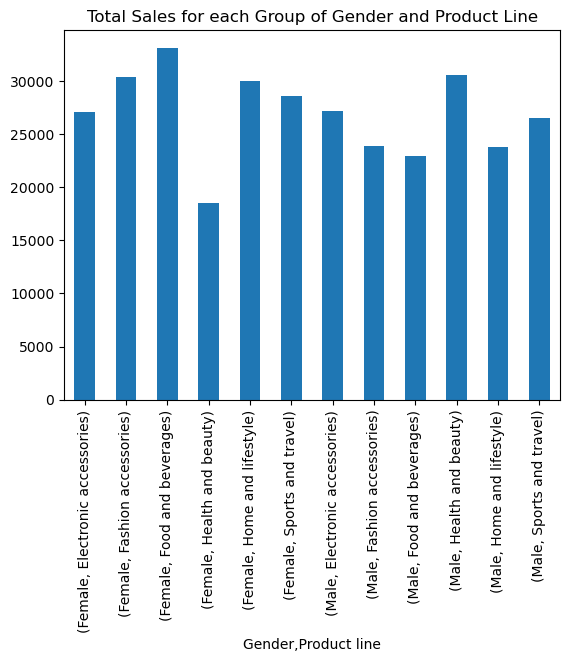

In [19]:
df_gender_product_line = df.groupby(['Gender','Product line'])['Total'].sum()
print(df_gender_product_line)
df_gender_product_line.plot(kind='bar',title='Total Sales for each Group of Gender and Product Line')

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64


<Axes: title={'center': 'Average Unit Price For Each Product Line'}, xlabel='Product line'>

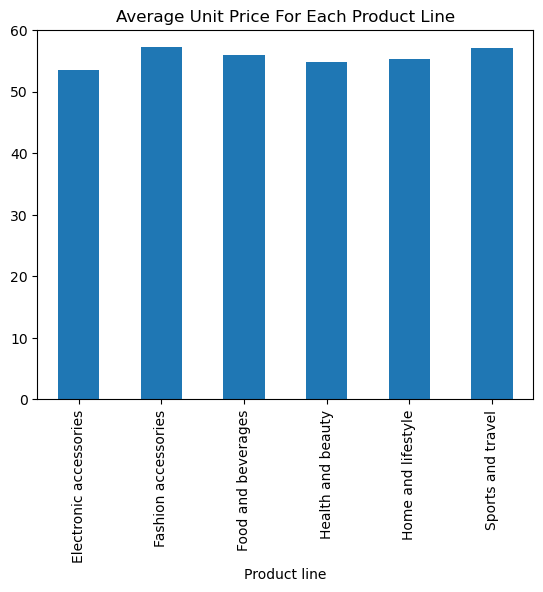

In [21]:
df_product_line_price = df.groupby('Product line')['Unit price'].mean()
print(df_product_line_price)
df_product_line_price.plot(kind='bar',title='Average Unit Price For Each Product Line')

In [22]:
df['gross_margin'] = (df['Total']-df['cogs'])/df['Total']
overall_gross_margin = df['gross_margin'].mean()
print(overall_gross_margin)

0.04761904761904762


City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64


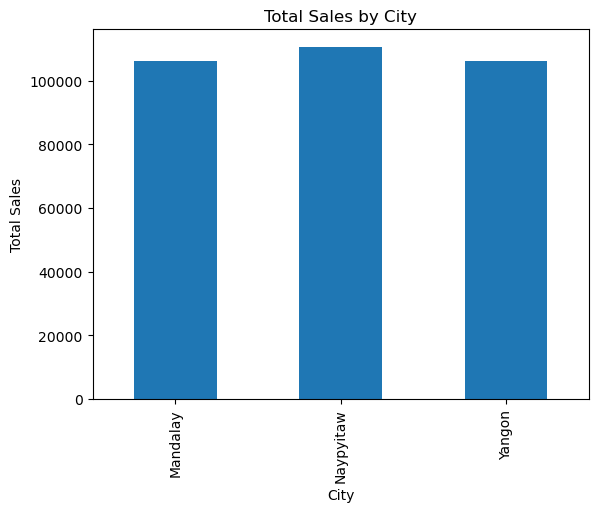

In [24]:
df_city_sales = df.groupby('City')['Total'].sum()
#create a bar chart to visualize the total sales for each city
df_city_sales.plot(kind='bar')

print(df_city_sales)

#add title and labels to the plot
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
# show the plot
plt.show()

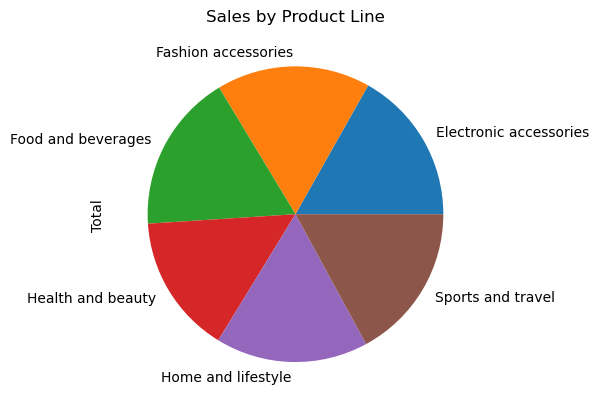

In [26]:
df.groupby('Product line')['Total'].sum().plot(kind='pie')
plt.title('Sales by Product Line')
plt.show()

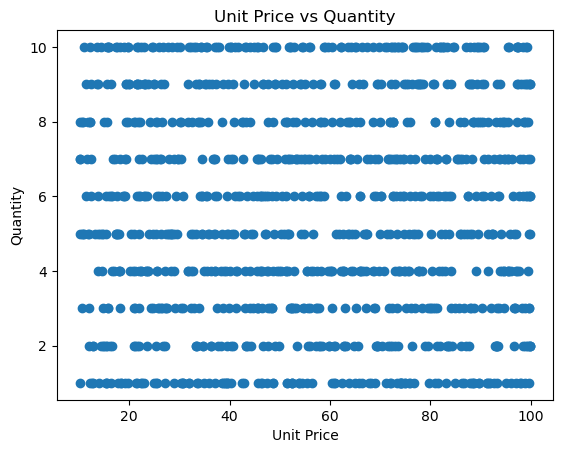

,Unit price,Quantity
Unit price,1.000000,0.010778
Quantity,0.010778,1.000000


In [27]:
plt.scatter(df['Unit price'],df['Quantity'])
plt.title('Unit Price vs Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()
df[['Unit price','Quantity']].corr()

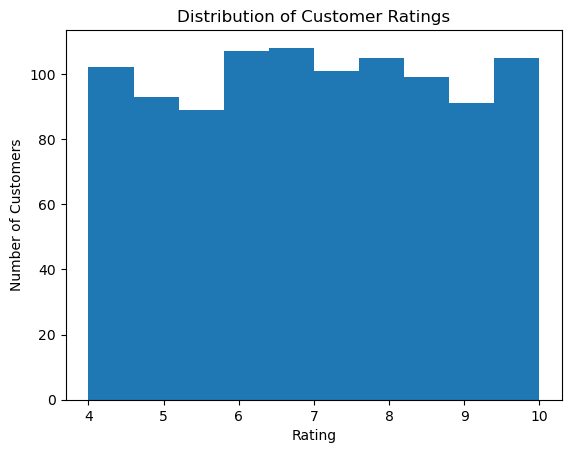

In [5]:
df['Rating'].plot(kind='hist')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Customers')
plt.show()

In [10]:
bins = np.linspace(min(df["Rating"]), max(df["Rating"]), 4)
print(min(df["Rating"]))
print(max(df["Rating"]))
print(bins)

group_names = ['Low', 'Medium', 'High'] # let's set our group names
df['rating-binned'] = pd.cut(df['Rating'], bins, labels=group_names, include_lowest=True )
df[['Rating','rating-binned']].head(20)

4.0
10.0
[ 4.  6.  8. 10.]


,Rating,rating-binned
0,9.1,High
1,9.6,High
2,7.4,Medium
3,8.4,High
4,5.3,Low
5,4.1,Low
6,5.8,Low
7,8.0,Medium
8,7.2,Medium
9,5.9,Low


In [31]:
df['rating-binned'].value_counts()

Medium    351
Low       341
High      308
Name: rating-binned, dtype: int64

Text(0.5, 1.0, 'Distribution of Customer Rating bins')

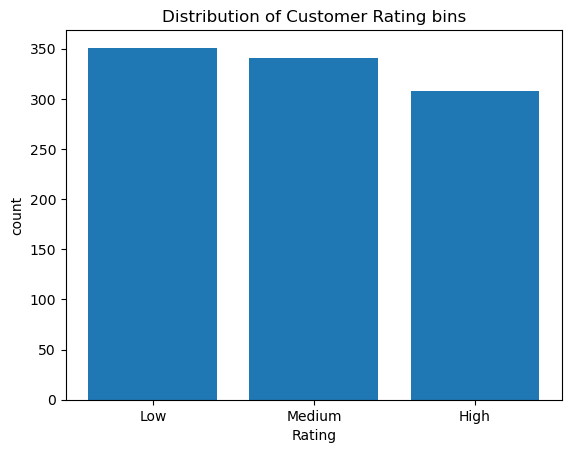

In [35]:
plt.bar(group_names, df['rating-binned'].value_counts())
plt.xlabel("Rating")
plt.ylabel("count")
plt.title("Distribution of Customer Rating bins")

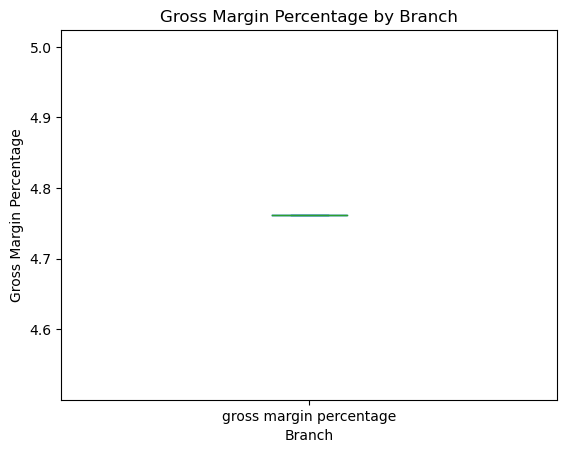

In [11]:
df_branch_margin = df.groupby('Branch')['gross margin percentage'].mean()
df_branch_margin.plot(kind='box')
plt.title('Gross Margin Percentage by Branch')
plt.xlabel('Branch')
plt.ylabel('Gross Margin Percentage')
plt.show()

Most popular product lines:
Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


<Axes: title={'center': 'Most popular Product Lines'}, xlabel='Product line'>

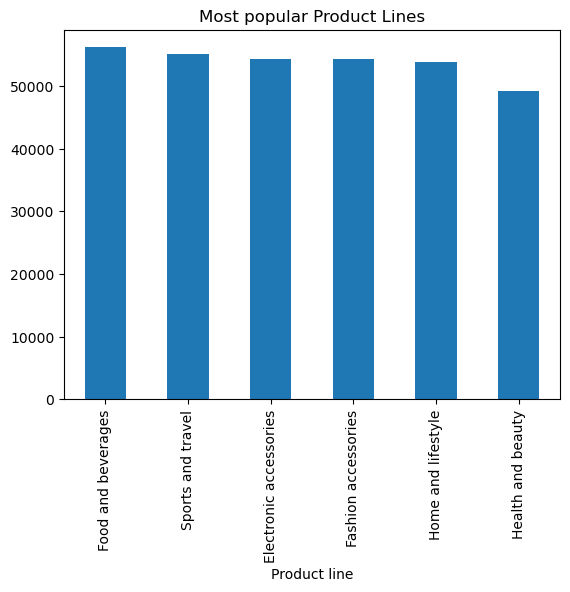

In [16]:
product_line_sales = df.groupby('Product line')['Total'].sum()
product_line_sales = product_line_sales.sort_values(ascending = False)
print('Most popular product lines:')
print(product_line_sales.head(10))
product_line_sales.head(10).plot(kind='bar',title='Most popular Product Lines')


Most profitable product lines:
Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64


<Axes: title={'center': 'Most Profitable Product Lines'}, xlabel='Product line'>

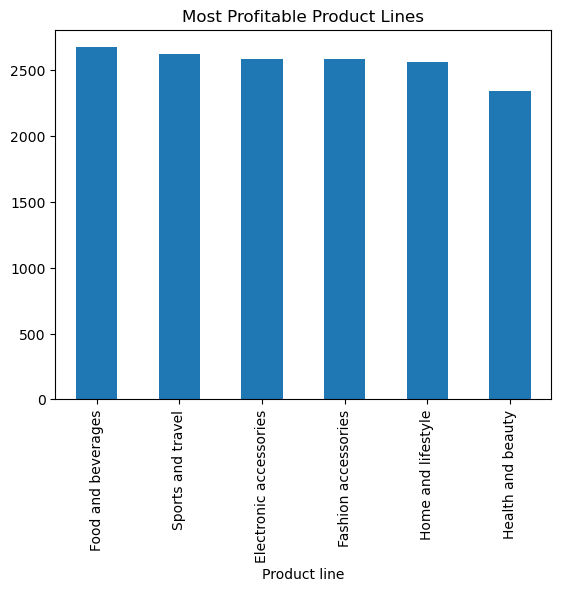

In [40]:
product_line_income = df.groupby('Product line')['gross income'].sum()

# sort the product lines by total gross income in descending order
product_line_income = product_line_income.sort_values(ascending=False)

# print the top 10 most profitable product lines
print('Most profitable product lines:')
print(product_line_income.head(10))

# visualize the most profitable product lines
product_line_income.head(10).plot(kind='bar', title = 'Most Profitable Product Lines')

Most popular payment methods:
Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Total, dtype: float64


<Axes: title={'center': 'Most Popular Payment Methods'}, xlabel='Payment'>

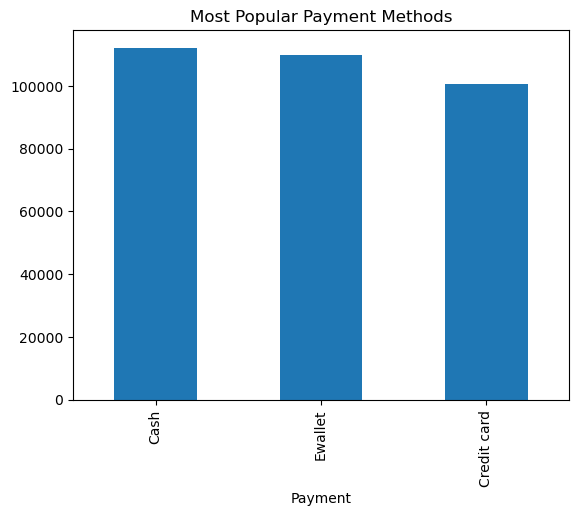

In [41]:
payment_method_sales = df.groupby('Payment')['Total'].sum()

# sort the payment methods by total sales in descending order
payment_method_sales = payment_method_sales.sort_values(ascending=False)

# print the most popular payment methods
print('Most popular payment methods:')
print(payment_method_sales.head(10))

# visualize the most popular payment methods
payment_method_sales.head(10).plot(kind='bar', title = 'Most Popular Payment Methods')

<Axes: xlabel='Payment', ylabel='Total'>

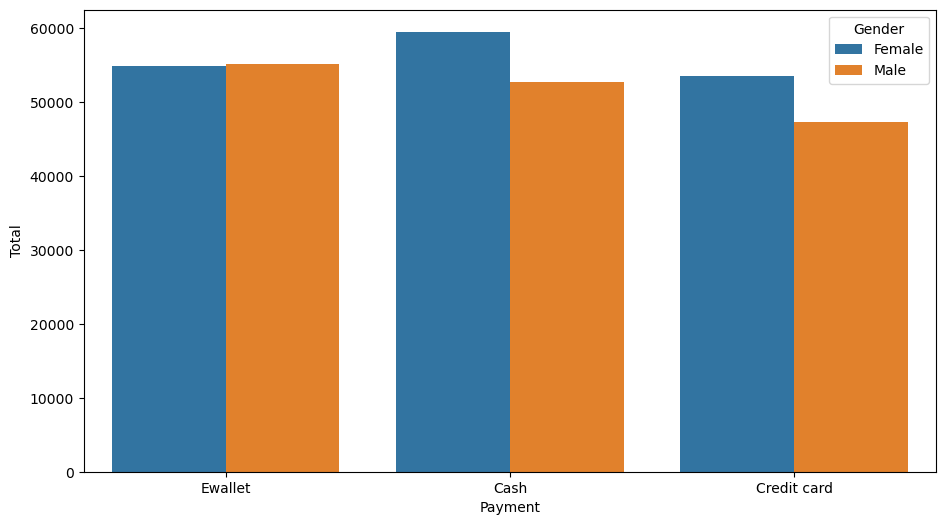

In [43]:

plt.figure(figsize = (11,6))
sns.barplot(x = 'Payment', y = 'Total', hue = 'Gender', data = df, errorbar = None, estimator = sum)

<Axes: xlabel='Payment', ylabel='Total'>

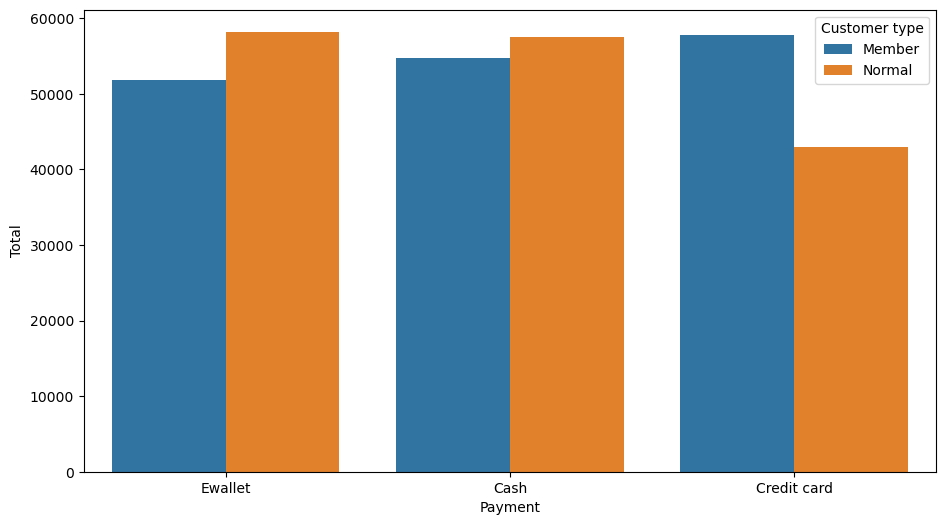

In [17]:
plt.figure(figsize= (11,6))
sns.barplot(x = 'Payment', y = 'Total', hue='Customer type', data=df,errorbar=None, estimator = sum)

Average unit prices an quantities for each product line:
                        Unit price  Quantity
Product line                                
Electronic accessories   53.551588  5.711765
Fashion accessories      57.153652  5.067416
Food and beverages       56.008851  5.471264
Health and beauty        54.854474  5.618421
Home and lifestyle       55.316937  5.693750
Sports and travel        56.993253  5.542169


C:\Users\code\AppData\Local\Temp\ipykernel_6916\3408672592.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_line_data = df.groupby('Product line')['Unit price','Quantity'].mean()


<Axes: title={'center': 'Average Unit Price and Quantities Per Product Line'}, xlabel='Product line'>

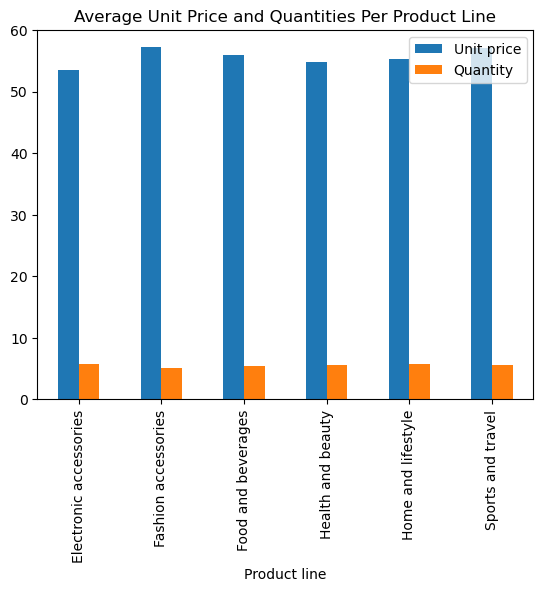

In [20]:
product_line_data = df.groupby('Product line')['Unit price','Quantity'].mean()
print('Average unit prices an quantities for each product line:')
print(product_line_data)
product_line_data.head(10).plot(kind='bar', title='Average Unit Price and Quantities Per Product Line')


<Axes: title={'center': 'Average Unit Price Per Product Line'}, xlabel='Product line'>

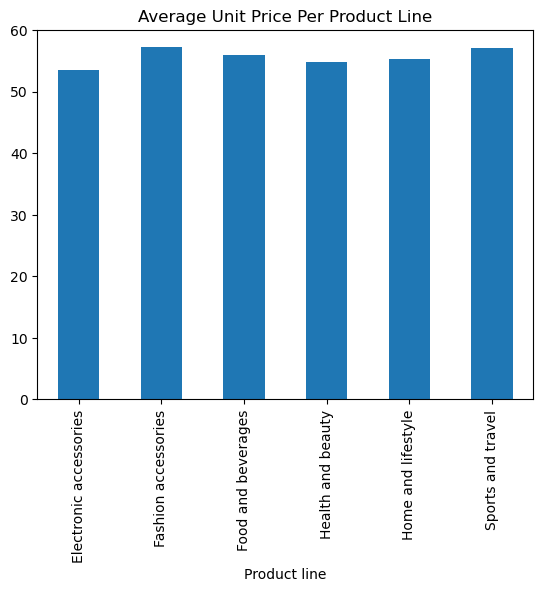

In [21]:
product_line_data ['Unit price'].plot(kind='bar',title='Average Unit Price Per Product Line')

<Axes: title={'center': 'Average Quantities Per Product Line'}, xlabel='Product line'>

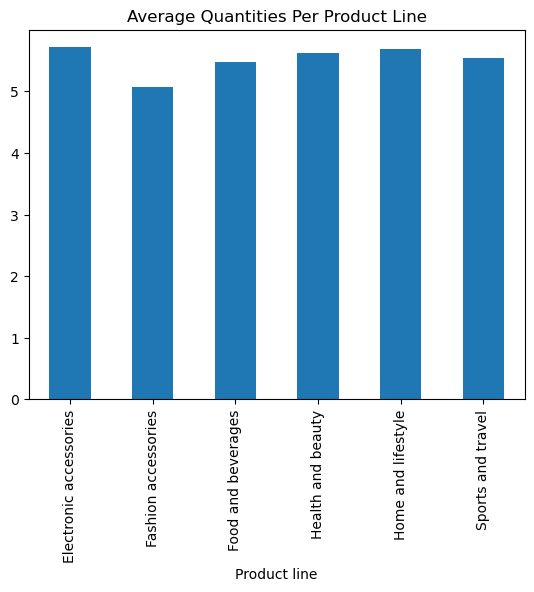

In [24]:
product_line_data['Quantity'].plot(kind='bar',title='Average Quantities Per Product Line')

Average gross margins and gross incomes for each product line:
                        gross margin percentage  gross income
Product line                                                 
Electronic accessories                 4.761905     15.220597
Fashion accessories                    4.761905     14.528062
Food and beverages                     4.761905     15.365310
Health and beauty                      4.761905     15.411572
Home and lifestyle                     4.761905     16.030331
Sports and travel                      4.761905     15.812630


C:\Users\code\AppData\Local\Temp\ipykernel_6916\3009440109.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_line_dataa = df.groupby('Product line')['gross margin percentage','gross income'].mean()


<Axes: title={'center': 'Average Gross margins and Gross Incomes Per Product Line'}, xlabel='Product line'>

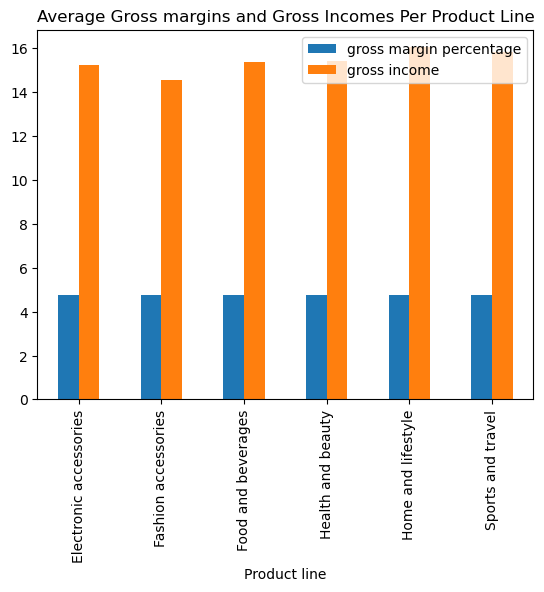

In [26]:
product_line_dataa = df.groupby('Product line')['gross margin percentage','gross income'].mean()
print('Average gross margins and gross incomes for each product line:')
print(product_line_dataa)
product_line_dataa.head(10).plot(kind='bar', title='Average Gross margins and Gross Incomes Per Product Line')

Average customer ratings for each product line:
Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


<Axes: title={'center': 'Average Customer Ratings Per Product Line'}, xlabel='Product line'>

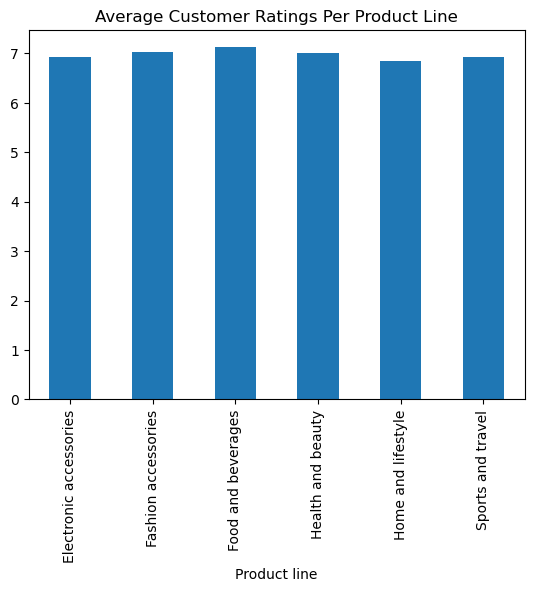

In [28]:
product_line_datta= df.groupby('Product line')['Rating'].mean()
print('Average customer ratings for each product line:')
print(product_line_datta)
product_line_datta.head(10).plot(kind='bar',title='Average Customer Ratings Per Product Line')

Most popular branches
              Total              Rating          
                sum        mean     sum      mean
Branch                                           
C       110568.7065  337.099715  2319.9  7.072866
A       106200.3705  312.354031  2389.2  7.027059
B       106197.6720  319.872506  2263.6  6.818072


C:\Users\code\AppData\Local\Temp\ipykernel_6916\3218544404.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  branch_data = df.groupby('Branch')['Total','Rating'].agg(['sum','mean'])


<Axes: title={'center': 'Most Popular Branch in Sales and Customer Ratings'}, xlabel='Branch'>

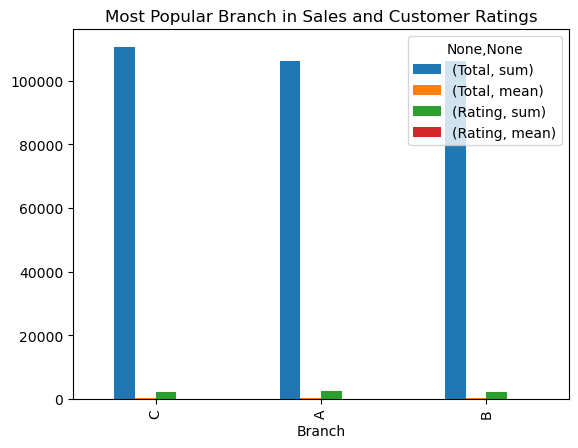

In [32]:
branch_data = df.groupby('Branch')['Total','Rating'].agg(['sum','mean'])
branch_data = branch_data.sort_values(('Total','sum'),ascending=False)
print('Most popular branches')
print(branch_data.head(10))
branch_data.head(10).plot(kind='bar',title='Most Popular Branch in Sales and Customer Ratings')

Most popular cities
                 Total              Rating          
                   sum        mean     sum      mean
City                                                
Mandalay   106197.6720  319.872506  2263.6  6.818072
Naypyitaw  110568.7065  337.099715  2319.9  7.072866
Yangon     106200.3705  312.354031  2389.2  7.027059


C:\Users\code\AppData\Local\Temp\ipykernel_6916\614684748.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_data = df.groupby('City')['Total','Rating'].agg(['sum','mean'])


<Axes: title={'center': 'Most Popular Cities in Sales and Customer Ratings'}, xlabel='City'>

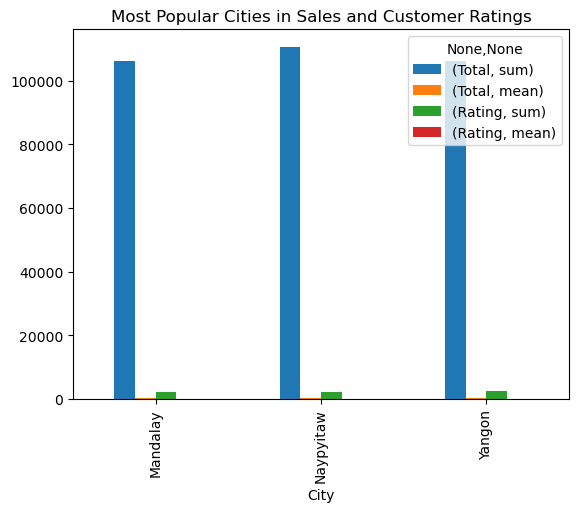

In [33]:
city_data = df.groupby('City')['Total','Rating'].agg(['sum','mean'])
City_data = city_data.sort_values(('Total','sum'),ascending=False)
print('Most popular cities')
print(city_data.head(10))
city_data.head(10).plot(kind='bar', title = 'Most Popular Cities in Sales and Customer Ratings')

Top 10 groups with the highest avarage customer ratings
Gender  Customer type  Payment      Product line          
Female  Member         Credit card  Electronic accessories    8.050000
Male    Normal         Credit card  Electronic accessories    7.925000
Female  Normal         Cash         Food and beverages        7.876923
Male    Member         Credit card  Electronic accessories    7.843750
                       Ewallet      Health and beauty         7.815385
Female  Normal         Cash         Health and beauty         7.738462
Male    Normal         Ewallet      Sports and travel         7.584211
Female  Member         Ewallet      Home and lifestyle        7.520000
                       Cash         Food and beverages        7.485000
        Normal         Cash         Fashion accessories       7.476471
Name: Rating, dtype: float64


<Axes: title={'center': 'Top groups with The highest Average Customer Ratings'}, xlabel='Gender,Customer type,Payment,Product line'>

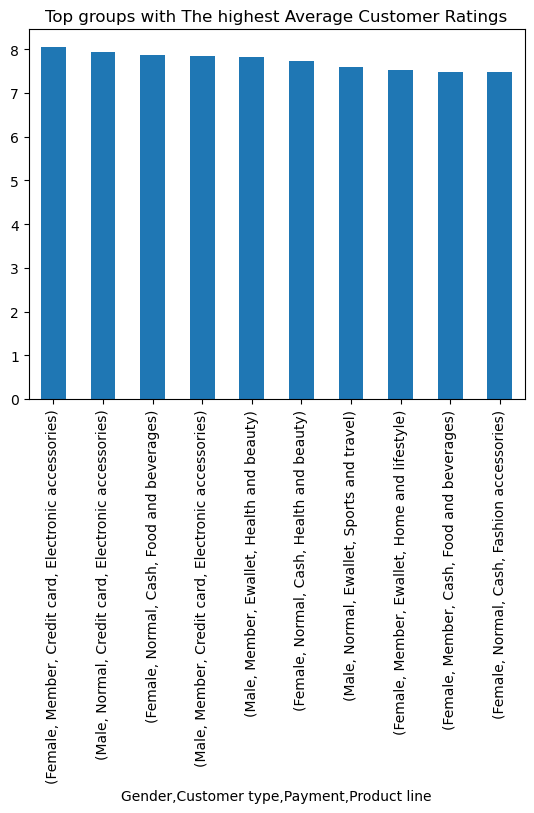

In [34]:
customer_data = df.groupby(['Gender', 'Customer type', 'Payment','Product line'])['Rating'].mean()
customer_data = customer_data.sort_values(ascending=False)
print('Top 10 groups with the highest avarage customer ratings')
print(customer_data.head(10))
customer_data.head(10).plot(kind='bar',title= 'Top groups with The highest Average Customer Ratings')

Top 10 groups with the lowest average customer ratings:
Gender  Customer type  Payment      Product line          
Male    Member         Cash         Home and lifestyle        6.073333
Female  Member         Ewallet      Food and beverages        6.100000
        Normal         Credit card  Home and lifestyle        6.133333
        Member         Ewallet      Sports and travel         6.181250
        Normal         Ewallet      Sports and travel         6.227273
                       Credit card  Electronic accessories    6.250000
        Member         Ewallet      Electronic accessories    6.250000
Male    Member         Credit card  Home and lifestyle        6.300000
Female  Normal         Ewallet      Home and lifestyle        6.335714
                                    Health and beauty         6.392857
Name: Rating, dtype: float64


<Axes: title={'center': 'Top Groups with The Lowest Average Customer Ratings'}, xlabel='Gender,Customer type,Payment,Product line'>

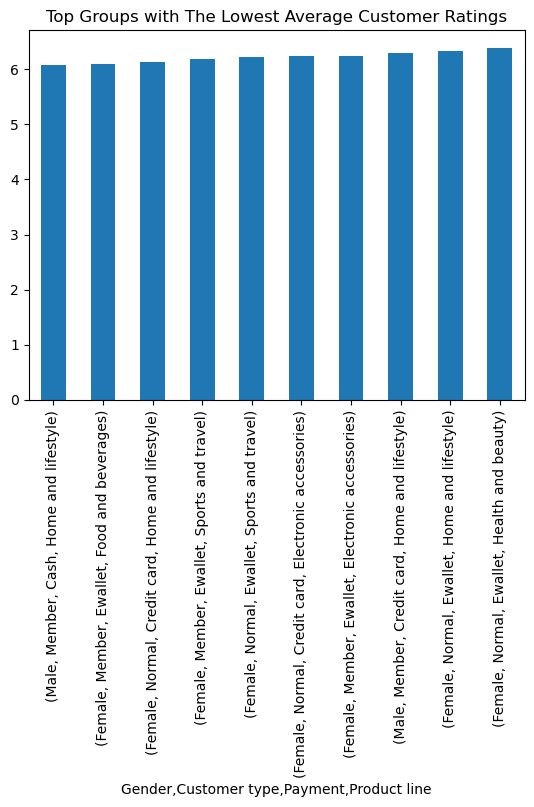

In [35]:
customer_dataa = df.groupby(['Gender','Customer type','Payment','Product line'])['Rating'].mean()
customer_dataa = customer_dataa.sort_values()
print('Top 10 groups with the lowest average customer ratings:')
print(customer_dataa.head(10))
customer_dataa.head(10).plot(kind='bar',title='Top Groups with The Lowest Average Customer Ratings')

Date
February     97219.374
January     116291.868
March       109455.507
Name: Total, dtype: float64


<Axes: title={'center': 'Monthly Sales'}, xlabel='Date'>

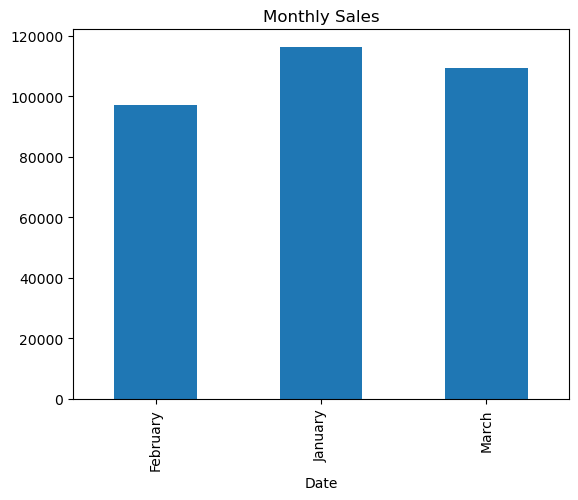

In [39]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(df['Date'].dt.strftime('%B'))['Total'].sum()
print(monthly_sales)
monthly_sales.plot(kind = 'bar',title = 'Monthly Sales')

Date
00    46
01    72
02    82
03    89
04    83
05    95
06    70
07    64
08    82
09    90
10    84
11    71
12    72
Name: Invoice ID, dtype: int64


<Axes: title={'center': 'Transactions Per Week'}, xlabel='Date'>

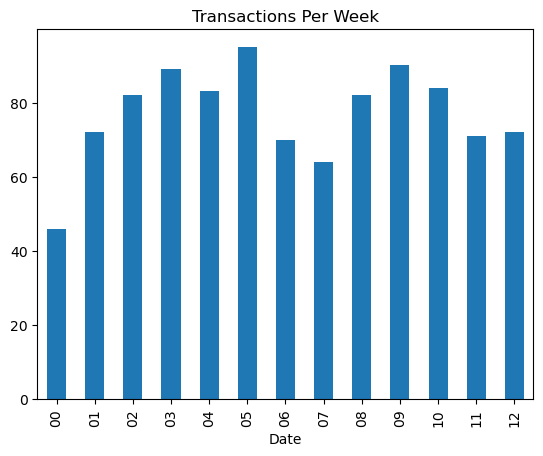

In [41]:
df['Date'] = pd.to_datetime(df['Date'])
transactions_per_week = df.groupby(df['Date'].dt.strftime('%U'))['Invoice ID'].nunique()
print(transactions_per_week)
transactions_per_week.plot(kind='bar',title='Transactions Per Week')

Date
Fri    139
Mon    125
Sat    164
Sun    133
Thu    138
Tue    158
Wed    143
Name: Invoice ID, dtype: int64


<Axes: title={'center': 'Transactions Per Day'}, xlabel='Date'>

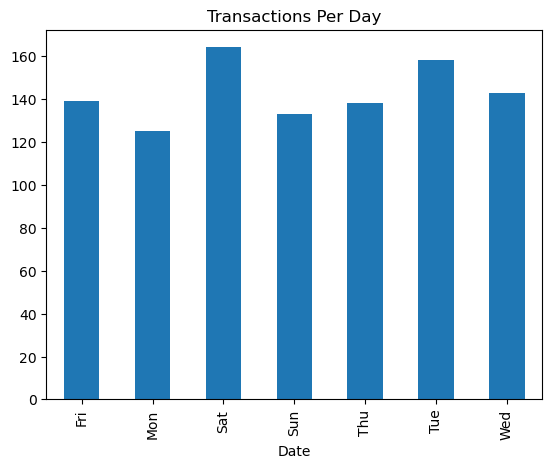

In [42]:
df['Date'] = pd.to_datetime(df['Date'])
transactions_per_day = df.groupby(df['Date'].dt.strftime('%a'))['Invoice ID'].nunique()
print(transactions_per_day)
transactions_per_day.plot(kind='bar',title='Transactions Per Day')

Time
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: Invoice ID, dtype: int64


<Axes: title={'center': 'Transactions Per Hour'}, xlabel='Time'>

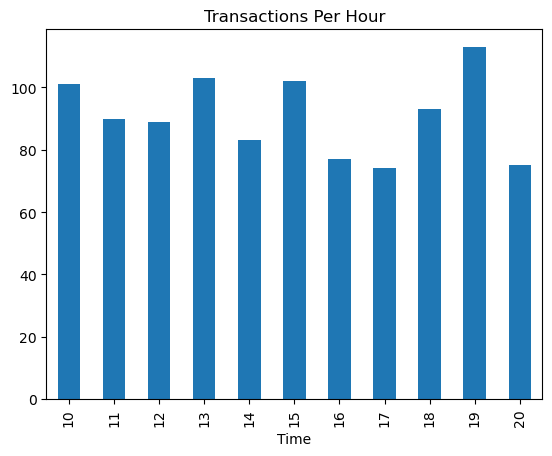

In [45]:
df['Time'] = pd.to_datetime(df['Time'])
transactions_per_hour = df.groupby(df['Time'].dt.strftime('%H'))['Invoice ID'].nunique()
print(transactions_per_hour)
transactions_per_hour.plot(kind='bar',title='Transactions Per Hour')

Top products sold on weekdays
Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


C:\Users\code\AppData\Local\Temp\ipykernel_6916\1101255717.py:2: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  weekend_data = product_data.loc[:,['Sat','Sun']]
C:\Users\code\AppData\Local\Temp\ipykernel_6916\1101255717.py:3: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  weekday_data = product_data.loc[:,['Mon','Tue','Wed','Thu','Fri']]


<Axes: title={'center': 'Top Products Sold on Weekdays'}, xlabel='Product line'>

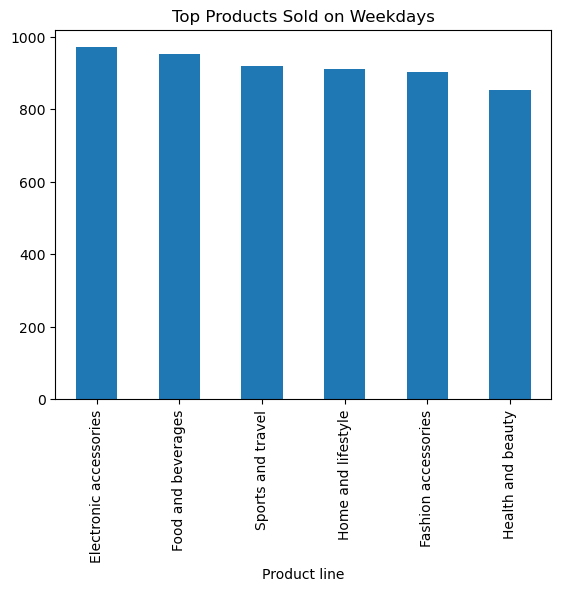

In [49]:
product_data = df.groupby(['Product line',df['Date'].dt.strftime('%a')])['Quantity'].sum()
weekend_data = product_data.loc[:,['Sat','Sun']]
weekday_data = product_data.loc[:,['Mon','Tue','Wed','Thu','Fri']]
weekend_data = weekend_data.groupby('Product line').sum()
weekday_data = weekday_data.groupby('Product line').sum()
weekend_data = weekend_data.sort_values(ascending=False)
weekday_data =weekday_data.sort_values(ascending=False)
print('Top products sold on weekdays')
print(weekday_data.head(10))
weekday_data.head(10).plot(kind='bar',title='Top Products Sold on Weekdays')



Top products sold on Weekends
Series([], Name: Quantity, dtype: int64)


<Axes: title={'center': 'Top Products Sold on Weekend'}, xlabel='Product line'>

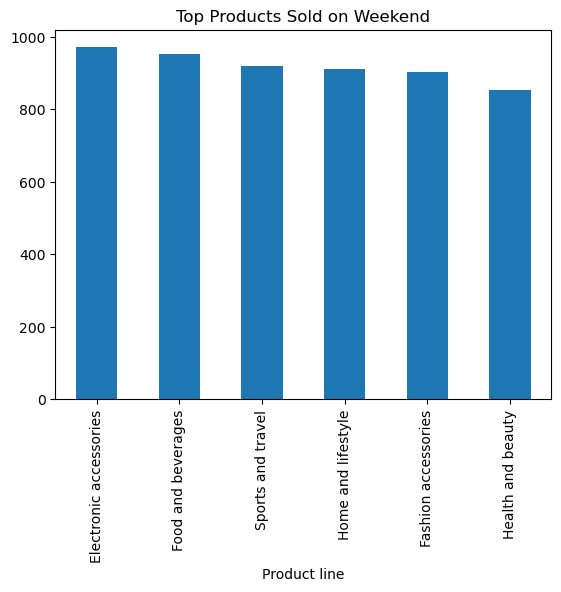

In [51]:
print('Top products sold on Weekends')
print(weekend_data.head(10))
weekday_data.head(10).plot(kind='bar',title='Top Products Sold on Weekend')



In [52]:
transaction_data = df.groupby(['Gender','Customer type','Payment','Date','Time'])['Quantity'].sum()
print('Top 10 groups with the highest total quantity sold:')
print(transaction_data.sort_values(ascending=False).head(10))

Top 10 groups with the highest total quantity sold:
Gender  Customer type  Payment      Date                 Time               
Female  Member         Credit card  2023-08-01 13:00:00  2023-08-01 13:00:00    20
Male    Member         Ewallet      2023-08-01 18:24:00  2023-08-01 18:24:00    20
Female  Normal         Cash         2023-08-01 14:42:00  2023-08-01 14:42:00    19
Male    Member         Cash         2023-08-01 16:28:00  2023-08-01 16:28:00    19
Female  Member         Ewallet      2023-08-01 17:38:00  2023-08-01 17:38:00    17
                       Credit card  2023-08-01 11:36:00  2023-08-01 11:36:00    17
Male    Normal         Cash         2023-08-01 16:44:00  2023-08-01 16:44:00    16
Female  Normal         Cash         2023-08-01 10:43:00  2023-08-01 10:43:00    16
        Member         Ewallet      2023-08-01 14:19:00  2023-08-01 14:19:00    15
Male    Normal         Ewallet      2023-08-01 10:55:00  2023-08-01 10:55:00    15
Name: Quantity, dtype: int64


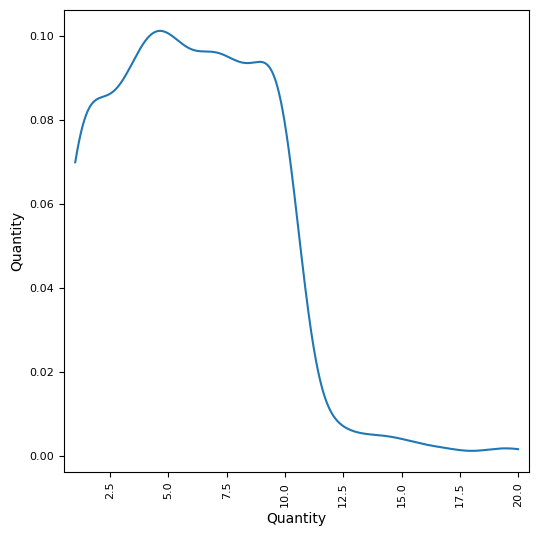

In [57]:
from pandas.plotting import scatter_matrix
transaction_data = transaction_data.to_frame()
scatter_matrix(transaction_data, alpha=0.2, figsize=(6,6),diagonal='kde')
plt.show()

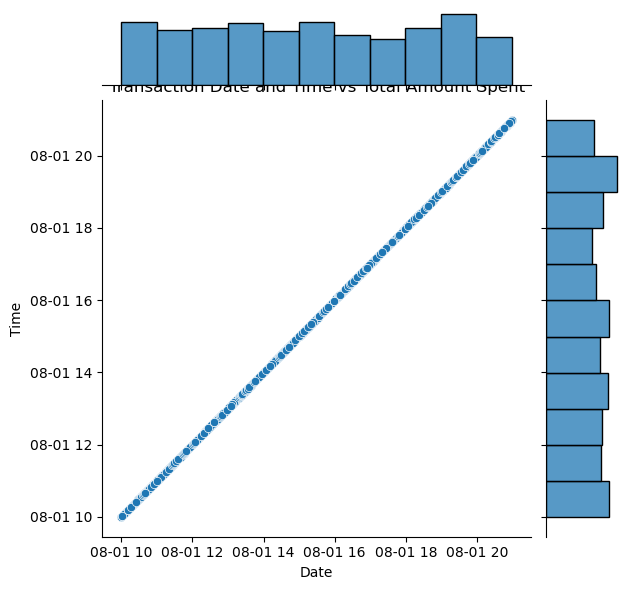

In [59]:
sns.jointplot(x='Date',y='Time',data=transaction_data,kind='scatter')
plt.xlabel('Date')
plt.ylabel('Time')
plt.title('Transaction Date and Time vs Total Amount Spent')
plt.show()

In [61]:
duplicate_invoices = df[df.duplicated(['Invoice ID'])]
print(duplicate_invoices[['Invoice ID','Branch','City','Product line', 'Unit price','Quantity','Total','Date', 'Time','Payment']])


Empty DataFrame
Columns: [Invoice ID, Branch, City, Product line, Unit price, Quantity, Total, Date, Time, Payment]
Index: []


In [62]:
df['z_score'] = (df['Total'] - df['Total'].mean()) / df['Total'].std()

# identify transactions with a z-score greater than 3 or less than -3
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

# print the characteristics of transactions with unusually high or low values
print(outliers[['Invoice ID', 'Branch', 'City', 'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time', 'Payment']])


Empty DataFrame
Columns: [Invoice ID, Branch, City, Product line, Unit price, Quantity, Total, Date, Time, Payment]
Index: []
